In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
from matplotlib.image import imread
import math

In [2]:
model = load_model('fmask.h5')

In [3]:
#make sure to scale the image array while predicting new images(1/255)

In [4]:
train_path = 'C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\my_shit\\Facemask\\data\\train'
test_path = 'C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\my_shit\\Facemask\\data\\test'

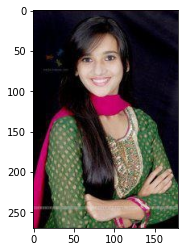

In [5]:
plt.imshow(imread(train_path+'\\without_mask\\0.jpg'))

In [6]:
nimg = imread(train_path+'\\without_mask\\0.jpg')

In [7]:
nimg.shape

(270, 180, 3)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [9]:
new_face_img = load_img(train_path+'\\without_mask\\0.jpg',target_size=(224,224,3))

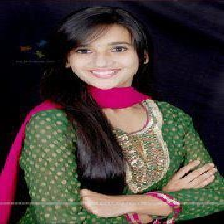

In [10]:
new_face_img

In [11]:
new_face_arr = img_to_array(new_face_img)

In [12]:
new_face_arr.shape

(224, 224, 3)

In [13]:
new_face_arr = np.expand_dims(new_face_arr,axis=0)

In [14]:
new_face_arr.shape

(1, 224, 224, 3)

In [15]:
new_face_arr = new_face_arr/255

In [16]:
model.predict(new_face_arr)

array([[0.00201653, 0.99798346]], dtype=float32)

In [17]:
#{'with_mask': 0, 'without_mask': 1}

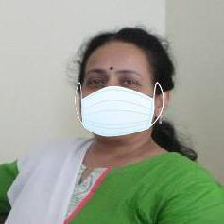

In [18]:
load_img(test_path+'\\with_mask\\augmented_image_148.jpg',target_size=(224,224,3))

In [19]:
new_face_img2 = load_img(test_path+'\\with_mask\\augmented_image_148.jpg',target_size=(224,224,3))
new_face_arr2 = img_to_array(new_face_img2)
new_face_arr2 = new_face_arr2/255
new_face_arr2 = np.expand_dims(new_face_arr2,axis=0)
model.predict(new_face_arr2.reshape(1,224,224,3))

array([[9.9999976e-01, 2.7599251e-07]], dtype=float32)

In [20]:
##lets load up the face detection model ie Haarcascade face detection model

In [21]:
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

166 134 358 358
[[0.6142556 0.3857444]]
0
851 111 356 356
[[0.984838 0.015162]]
0


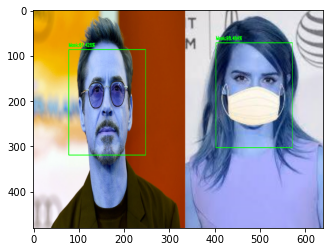

In [22]:
#label dict
# def detect(path):
label_dict = {0:'Mask',1:'No Mask'}
color_dict={1:(0,0,255),0:(0,255,0)}

image = cv2.imread(test_path+'\\with_mask\\test.png')
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# new_image = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))
faces = haar.detectMultiScale(image)
for f in faces:
        (x, y, w, h) = [v for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        print(x,y,w,h)
        face_img = image
        resized=cv2.resize(face_img,(224,224))
        normalized=resized/255
        reshaped=np.reshape(normalized,(1,224,224,3))
        result=model.predict(reshaped)
        print(result)

        
#choose the index of the label_dict
        label=np.argmax(result,axis=1)[0]
        print(label)
        text ="{0:s}:{1:.3f}% ".format(label_dict[label],(np.max(result)*100)) 
        
        f_mask = cv2.rectangle(image,(x,y),(x+w,y+h),color_dict[label],2)
        f_mask = cv2.putText(image, text, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.55,color_dict[label],2)
        f_mask = cv2.resize(image,(640,480))
    
#     cv2.imshow('mask',image)
        cv2.imwrite('mask1.png',f_mask)
        plt.imshow(f_mask)

In [23]:
faces

array([[166, 134, 358, 358],
       [851, 111, 356, 356]], dtype=int32)

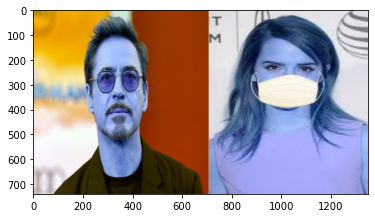

In [24]:
sample =cv2.imread(test_path+'\\with_mask\\test.png')
plt.imshow(sample)

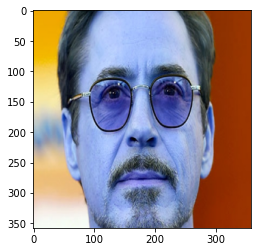

In [25]:
# crop image to get individual faces (crop_img = img[y:y+h, x:x+w])
plt.imshow(sample[134:134+358,166:166+358])

In [31]:
prototxt = 'model_data\\deploy.prototxt'
caffe_model = 'model_data/weights.caffemodel'

In [33]:
face_detect_model = cv2.dnn.readNetFromCaffe(prototxt,caffe_model)

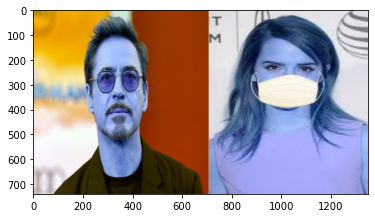

In [36]:
image = cv2.imread(test_path+'\\with_mask\\test.png')
plt.imshow(image)

In [37]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [40]:
face_detect_model.setInput(blob)

In [41]:
detections = face_detect_model.forward()
detections

array([[[[0.        , 1.        , 0.9761286 , ..., 0.13278851,
          0.3335757 , 0.6970483 ],
         [0.        , 1.        , 0.8058266 , ..., 0.1289753 ,
          0.8604832 , 0.56335616],
         [0.        , 1.        , 0.13560109, ..., 3.991985  ,
          4.8356123 , 4.9751663 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [46]:
detections.shape

(1, 1, 200, 7)

In [52]:
detections[0, 0, 0, 2]

0.9761286

166 134 358 358
[[2.990935e-04 9.997009e-01]]
1
851 111 356 356
[[9.9999976e-01 2.7094410e-07]]
0


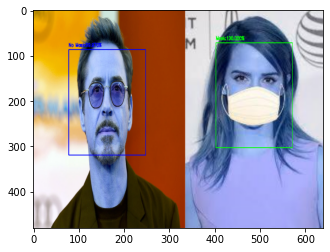

In [26]:
#label dict
# def detect(path):
label_dict = {0:'Mask',1:'No Mask'}
color_dict={1:(0,0,255),0:(0,255,0)}

image = cv2.imread(test_path+'\\with_mask\\test.png')
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# new_image = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))
faces = haar.detectMultiScale(image)
for f in faces:
        (x, y, w, h) = [v for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        print(x,y,w,h)
        face_img = image[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(224,224))
        normalized=resized/255
        reshaped=np.reshape(normalized,(1,224,224,3))
        result=model.predict(reshaped)
        print(result)

        
#choose the index of the label_dict
        label=np.argmax(result,axis=1)[0]
        print(label)
        text ="{0:s}:{1:.3f}% ".format(label_dict[label],(np.max(result)*100)) 
        
        f_mask = cv2.rectangle(image,(x,y),(x+w,y+h),color_dict[label],2)
        f_mask = cv2.putText(image, text, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.55,color_dict[label],2)
        f_mask = cv2.resize(image,(640,480))
    
#     cv2.imshow('mask',image)
        cv2.imwrite('mask1.png',f_mask)
        plt.imshow(f_mask)

In [27]:
cv2.imread(test_path+'\\with_mask\\augmented_image_148.jpg')[1]

array([[201, 206, 205],
       [202, 207, 206],
       [202, 207, 206],
       [203, 208, 207],
       [203, 208, 207],
       [202, 207, 206],
       [202, 207, 206],
       [201, 206, 205],
       [202, 207, 206],
       [202, 207, 206],
       [202, 207, 206],
       [202, 207, 206],
       [202, 207, 206],
       [202, 207, 206],
       [202, 207, 206],
       [202, 207, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206, 206],
       [204, 206